In [558]:
# Import libraries

import numpy as np
import random
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
%matplotlib inline

In [559]:
# Read the data from file Feature data and label data

with open('iris.data') as f:
    read_data = f.read()

read_data    = read_data.split("\n")
temp_data    = []
label        = []
data         = read_data[0 : len(read_data) - 2]
feature_data = []

for line in data:
    line = line.split(",")
    for indx in range(4):
        line[indx] = float(line[indx])
    feature_data.append(line[0 : 4])
    temp_data.append(line[len(line) - 1])

# Converting string labels into integer labels

for line in temp_data:
    if line == 'Iris-versicolor':
        label.append(1)
    elif line == 'Iris-virginica':
        label.append(2)
    else:
        label.append(0)

##################################################################################################

# Shuffle the data and labels

numbers = [i for i in range(150)]

random.seed(10)
random.shuffle(numbers)

# After the data is shuffled, store the data in processed_data and processed_label

processed_data  = []
processed_label = []

for i in range(150):
    processed_data.append(feature_data[numbers[i]])  
    processed_label.append(label[numbers[i]])  
      
# Split the processed data into 80% train and 20% test data

split1 = int(0.8 * len(feature_data))
split2 = int(0.9 * len(feature_data))

train_data = processed_data[:split1]
test_data  = processed_data[split1:]

# Split the processed_label into 80% train and 20% test label

train_label = processed_label[:split1]
test_label  = processed_label[split1:]

##################################################################################################


In [560]:
# Create A matrix and Y matrix from train data and train label

print("****** Task 1: TRAINING A MODEL USING LINEAR REGRESSION ******\n")
print("We have started training our model with the given data...")
a_matrix = np.array(train_data)
y_matrix = np.array(train_label)

# Computing the value of beta
a_transpose = a_matrix.transpose()

at_a = np.dot(a_transpose, a_matrix)
at_y = np.dot(a_transpose, y_matrix)

at_a_inv = np.linalg.inv(at_a)

beta = np.dot(at_a_inv,at_y)

print("We are done training the model...")
print("Beta values are :")
print(beta)

##################################################################################################

# Computing predicted values for train data using beta.

train_yhat = np.dot(train_data, beta)

root_mean_sq_error = np.sqrt(sum(pow(train_yhat-train_label,2))/len(train_data))

print("\nRoot Mean Square Error on Train data is:", root_mean_sq_error)

****** Task 1: TRAINING A MODEL USING LINEAR REGRESSION ******

We have started training our model with the given data...
We are done training the model...
Beta values are :
[-0.06783823 -0.05100051  0.23211928  0.56832216]

Root Mean Square Error on Train data is: 0.21049548857087655


In [561]:
# Computing predicted values for test data using beta.
y_hat = np.dot(test_data, beta)

predicted_label = []
for d in y_hat:
    if(d < 0.50):
        predicted_label.append(0)
    elif(d >= 0.50 and d < 1.50):
        predicted_label.append(1)
    else:
        predicted_label.append(2)

print("\n****** Task 2: CLASSIFICATION ******\n")
print("Predicted Value on test data is given by:")
print("Y hat\n", y_hat)
print("\n")

root_mean_sq_error = np.sqrt(sum(pow(y_hat-test_label,2))/len(test_data))

print("Root Mean Square Error on Test data is:", root_mean_sq_error)
print("\nWe can see that there is not much difference in RMSE of both Train data and Test data which \nindicates that there is no overfitting. ")




****** Task 2: CLASSIFICATION ******

Predicted Value on test data is given by:
Y hat
 [ 1.21546164 -0.14987397  1.21093372 -0.14868096  1.33082616  2.05689174
 -0.13619254  1.89248379  1.16843323  1.19759985 -0.1101852   1.84221082
 -0.01396994  1.08440067  1.32489698 -0.02110133  1.54839305  1.73245735
  1.46610932  1.96658635  0.04967852  1.11068132  1.76405871  2.25380833
  1.36368237 -0.00831407  1.59528216  2.16469595 -0.00775825  1.68552641]


Root Mean Square Error on Test data is: 0.2388538941422603

We can see that there is not much difference in RMSE of both Train data and Test data which 
indicates that there is no overfitting. 


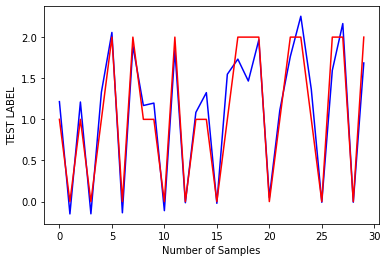

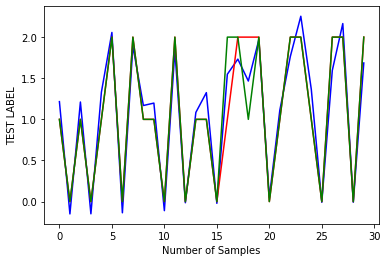

BLUE  --> Predicted Value of Y
GREEN --> Tuning Predicted Value (Y) after Classification
RED   --> Actual Value of Y 

We can see that Red line and Green line are almost similar and are not overlapping 
at one point i.e. between 15 and 20. 
It is evident from the plot that the Model is predicting almost all the values correctly.
Only one value got incorrectly classified.


In [569]:
# Plot scatter plot test_data and test_label

x =  [i for i in range(30)]

plt.plot(x,y_hat, c = "b")
plt.plot(x,test_label, c ="r")
plt.xlabel("Number of Samples")
plt.ylabel("TEST LABEL")
plt.show()

plt.plot(x,y_hat, c = "b")
plt.plot(x,test_label, c ="r")
plt.plot(x,predicted_label, c="g")
plt.xlabel("Number of Samples")
plt.ylabel("TEST LABEL")

plt.show()
print("BLUE  --> Predicted Value of Y")
print("GREEN --> Tuning Predicted Value (Y) after Classification")
print("RED   --> Actual Value of Y ")
print("\nWe can see that Red line and Green line are almost similar and are not overlapping \nat one point i.e. between 15 and 20. ")
print("It is evident from the plot that the Model is predicting almost all the values correctly.\nOnly one value got incorrectly classified.")

In [564]:
#Cross Validation

def cross_validation(data,label,k):
    K = []
    rmse_valid_list = []
    rmse_train_list = []
    
    length = int(len(label)/k)
    for i in range(k):
        K.append(i+1)
        cv_train_data = []
        cv_valid_data = []
        
        cv_train_label = []
        cv_valid_label = []
        
        temp_data1  = []
        temp_data2  = []
        temp_label1 = []
        temp_label2 = []
        cv_valid_data  = data[(i*length) : (i*length+length)]
        cv_valid_label = label[(i*length) : (i*length+length)]
               
        #print("--------------------------",i)
        
        if i == 0 :
            temp_data1  = []
            temp_data2  = data[length+i*length:]
            temp_label1 = []
            temp_label2 = label[length+i*length:]
            cv_train_data  = temp_data2
            cv_train_label = temp_label2
        elif i == (k-1):
            temp_data1  = data[0:i*length]
            temp_data2  = []
            temp_label1 = label[0:i*length]
            temp_lable2 = []
            cv_train_data  = temp_data1
            cv_train_label = temp_label1
        else :
            temp_data1  = data[0:i*length]
            temp_data2  = data[length+i*length : ]
            temp_label1 = label[0:i*length]
            temp_label2 = label[length+i*length : ]
            
            for val_td2 in temp_data2:
                temp_data1.append(val_td2)
                
            cv_train_data  = temp_data1
            
            for val_tl2 in temp_label2:
                temp_label1.append(val_tl2)
                
            cv_train_label = temp_label1

        
       # print("Temp label 1",temp_label1)
       # print("Temp label 2",temp_label2)
       # print("CV train label:",cv_train_label)
        #print("Train data",cv_train_data)
        
        cv_a_matrix = np.array(cv_train_data)
        cv_y_matrix = np.array(cv_train_label)

        #Computing the value of beta
        #print(cv_a_matrix)
        cv_a_transpose=cv_a_matrix.transpose()
        #print(cv_a_transpose)
        
        cv_at_a = np.dot(cv_a_transpose, cv_a_matrix)
        #print("",cv_at_a)

        cv_at_y = np.dot(cv_a_transpose, cv_y_matrix)
        #print(at_y)

        cv_at_a_inv = np.linalg.inv(cv_at_a)
        #print(at_a_inv)

        cv_beta = np.dot(cv_at_a_inv,cv_at_y)
        
        
        print("Fold " + str(i+1) + " execution completed")
        print("Beta values for FOLD "+ str(i+1) +" are :")
        print(cv_beta)
        print("\n")
        
        #Computing predicted values for train data using beta.
        
        cv_train_yhat = np.dot(cv_train_data, cv_beta)      
        root_mean_sq_error = np.sqrt(sum(pow(cv_train_yhat-cv_train_label,2))/len(cv_train_data))
        #print("Root Mean Square Error on Train data is:", root_mean_sq_error)
        rmse_train_list.append(root_mean_sq_error)

        cv_valid_yhat = np.dot(cv_valid_data, cv_beta)  
        root_mean_sq_error = np.sqrt(sum(pow(cv_valid_yhat-cv_valid_label,2))/len(cv_valid_data))
        #print("Root Mean Square Error on Valid data is:", root_mean_sq_error)
        rmse_valid_list.append(root_mean_sq_error)
    
    
    print("Root Mean Square Error on Train data is:",rmse_train_list)
    print("Root Mean Square Error on Validation data is:",rmse_valid_list)    
    
    plt.plot(K,rmse_valid_list, c = "g")
    plt.plot(K,rmse_train_list, c = "b")
    
    '''
    first_legend = plt.legend(handles=[curve1], loc='upper right')  
    ax = plt.gca().add_artist(first_legend)  
    plt.legend(handles=[curve2], loc='lower right')
    '''
    
    plt.xlabel("Number of Fold")
    plt.ylabel("RMSE")
    plt.show()
    print("GREEN --> RMSE Values on Validation Data")
    print("Blue  --> RMSE Values on Train Data\n")
    
    print("We can see that we are getting highest accuracy in the first fold.")
    print("Also, in the 4th fold there is not much difference in Validation data accuracy and Test data accuracy.")
    
    avg_effect = sum(rmse_valid_list)/len(rmse_valid_list)
    
    print("\nTotal effectiveness of our Model:",avg_effect)
    
    


****** Task 3: CROSS-VALIDATION ****** 

Fold 1 execution completed
Beta values for FOLD 1 are :
[-0.09008709 -0.03167675  0.23554752  0.6030665 ]


Fold 2 execution completed
Beta values for FOLD 2 are :
[-0.06961343 -0.04732605  0.22362905  0.60157622]


Fold 3 execution completed
Beta values for FOLD 3 are :
[-0.08428757 -0.03374233  0.27266912  0.51958063]


Fold 4 execution completed
Beta values for FOLD 4 are :
[-0.09226948 -0.00945412  0.22597381  0.58730258]


Fold 5 execution completed
Beta values for FOLD 5 are :
[-0.03922674 -0.06158844  0.16004528  0.62870399]


Root Mean Square Error on Train data is: [0.23774860622254168, 0.22483327329709799, 0.18775775629145078, 0.21378276474747956, 0.18832984654447765]
Root Mean Square Error on Validation data is: [0.10007581590092149, 0.18179061063765475, 0.3345232259341278, 0.22956087229775915, 0.3534449887686841]


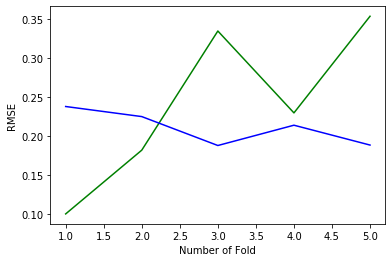

GREEN --> RMSE Values on Validation Data
Blue  --> RMSE Values on Train Data

We can see that we are getting highest accuracy in the first fold.
Also, in the 4th fold there is not much difference in Validation data accuracy and Test data accuracy.

Total effectiveness of our Model: 0.23987910270782944


In [565]:
kfold=5
print("\n****** Task 3: CROSS-VALIDATION ****** \n")
cross_validation(feature_data,label,kfold)

In [ ]:
# References

# https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
# https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014
# https://cs230.stanford.edu/blog/split/
# https://learncodingfast.com/python-programming-challenge-2-multiplying-matrices-without-numpy/
# https://en.wikipedia.org/wiki/Linear_regression
# https://www.geeksforgeeks.org/determinant-of-a-matrix/
# https://en.wikipedia.org/wiki/Stochastic_gradient_descent
# https://datascience.stackexchange.com/questions/9167/what-does-rmse-points-about-performance-of-a-model-in-machine-learning
# https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f
